In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
from google.colab import files
uploaded=files.upload()

Saving statsfinal.csv to statsfinal (2).csv


In [14]:
product_sales_df = pd.read_csv('statsfinal.csv')


In [15]:
product_sales_df.shape

(4600, 10)

In [80]:
p1 = product_sales_df.drop(['Date','Unnamed: 0'], axis=1)
sns.pairplot(p1)

Output hidden; open in https://colab.research.google.com to view.

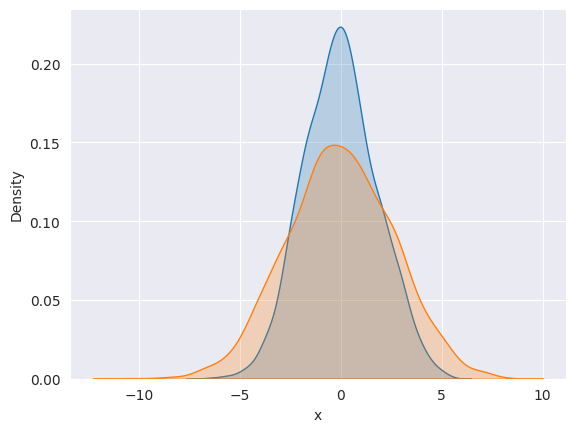

In [84]:
data = np.random.multivariate_normal([0, 0], [[5, 8], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])
sns.kdeplot(data["x"], shade=True)
sns.kdeplot(data["y"], shade=True)
plt.show()

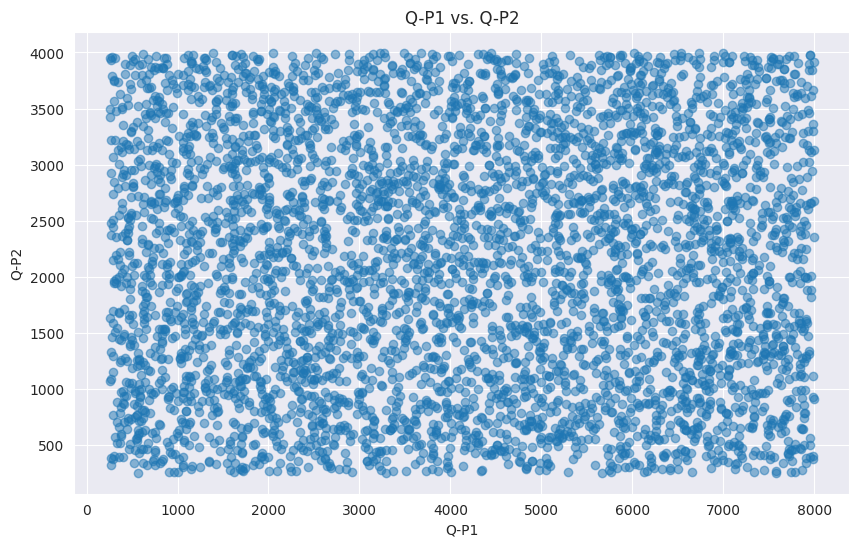

In [92]:


# Define the names of the columns you want to compare
column1_name = 'Q-P1'  # Replace with the name of the first column
column2_name = 'Q-P2'  # Replace with the name of the second column

# Extract data from the DataFrame
data_column1 = product_sales_df[column1_name]
data_column2 = product_sales_df[column2_name]

# Create a graph to compare the two columns
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# You can choose the type of graph you want, for example, a scatter plot
plt.scatter(data_column1, data_column2, alpha=0.5)  # alpha sets transparency

plt.xlabel(column1_name)
plt.ylabel(column2_name)
plt.title(f'{column1_name} vs. {column2_name}')

plt.grid(True)  # Add gridlines if desired

plt.show()


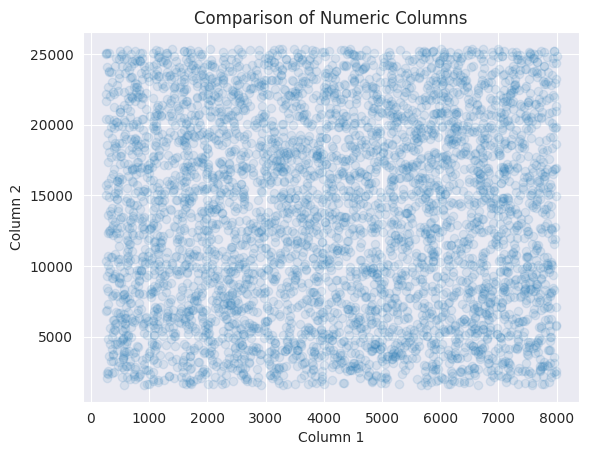

In [87]:
x = product_sales_df['Q-P1']
y = product_sales_df['S-P2']

plt.scatter(x,y, alpha=0.1)

# Add labels and a title
plt.xlabel('Column 1')
plt.ylabel('Column 2')
plt.title('Comparison of Numeric Columns')

# Show the graph
plt.show()

<Axes: xlabel='S-P1', ylabel='Density'>

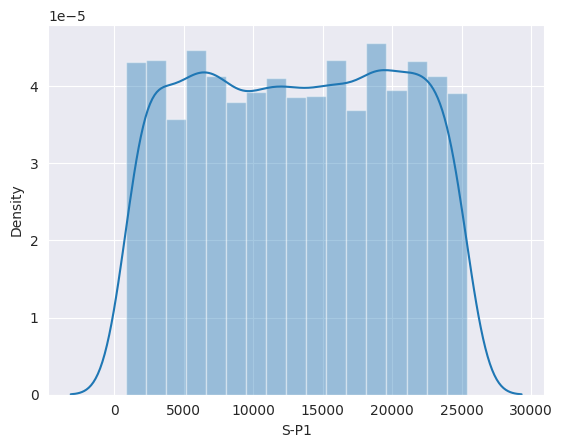

In [32]:


sns.distplot(product_sales_df['S-P1'])


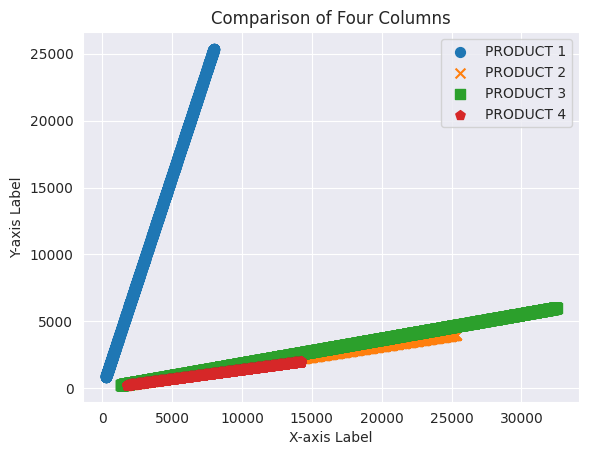

In [38]:


# Extract data from the DataFrame
x1 = product_sales_df['Q-P1']
y1 = product_sales_df['S-P1']
x2 = product_sales_df['S-P2']
y2 = product_sales_df['Q-P2']
x3 = product_sales_df['S-P3']
y3 = product_sales_df['Q-P3']
x4 = product_sales_df['S-P4']
y4 = product_sales_df['Q-P4']

# Create a scatter plot
plt.scatter(x1, y1, label='PRODUCT 1', marker='o', s=50)
plt.scatter(x2, y2, label='PRODUCT 2', marker='x', s=50)
plt.scatter(x3, y3, label='PRODUCT 3', marker='s', s=50)
plt.scatter(x4, y4, label='PRODUCT 4', marker='p', s=50)

# Add labels and a legend
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Comparison of Four Columns')
plt.legend()

# Show the graph
plt.show()


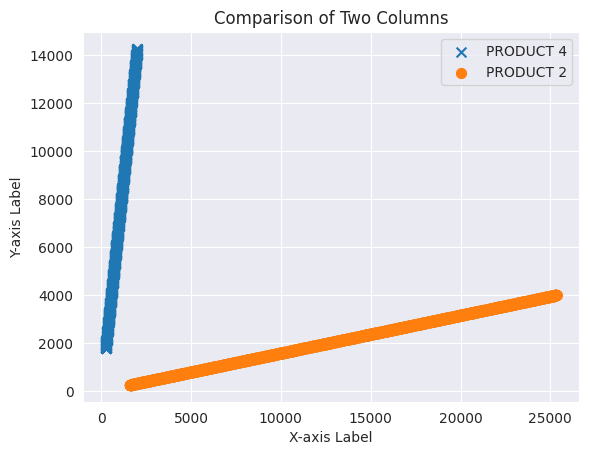

In [97]:

# Extract data from the DataFrame
x1 = product_sales_df['Q-P4']
y1 = product_sales_df['S-P4']
x2 = product_sales_df['S-P2']
y2 = product_sales_df['Q-P2']


# Create a scatter plot
plt.scatter(x1, y1, label='PRODUCT 4', marker='x', s=50)
plt.scatter(x2, y2, label='PRODUCT 2', marker='o', s=50)


# Add labels and a legend
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Comparison of Two Columns')
plt.legend()

# Show the graph
plt.show()

In [62]:

from sklearn.metrics.pairwise import cosine_similarity


data = product_sales_df[['Q-P1', 'Q-P2' , 'Q-P3' , 'Q-P4' , 'S-P1' , 'S-P2' , 'S-P3' , 'S-P4']]

# Normalize the data (you can use Min-Max scaling)
normalized_data = (data - data.min()) / (data.max() - data.min())

# Calculate cosine similarity
cosine_sim = cosine_similarity(normalized_data, normalized_data)

# Create a DataFrame for the cosine similarity matrix
cosine_sim_df = pd.DataFrame(cosine_sim, index=product_sales_df.index, columns=product_sales_df.index)

# Recommend products based on user behavior
def recommend_products(product_index, n=1000):
    sim_scores = cosine_sim_df[product_index]
    product_indices = sim_scores.nlargest(n + 1).index[1:]  # Exclude the product itself
    recommended_products = product_sales_df.iloc[product_indices]
    return recommended_products

# Example: Recommend products similar to the first product (index 0)
recommended_products = recommend_products(0)
print(recommended_products)


      Unnamed: 0        Date  Q-P1  Q-P2  Q-P3  Q-P4      S-P1      S-P2  \
1356        1356  06-03-2014  5836  3786   675   837  18500.12  24003.24   
667          667  14-04-2012  5024  3803   409   851  15926.08  24111.02   
1951        1951  23-10-2015  5068  3554   680   743  16065.56  22532.36   
3184        3184  15-03-2019  5053  3634  1061   934  16018.01  23039.56   
3256        3256  26-05-2019  4913  3497  1064   896  15574.21  22170.98   
...          ...         ...   ...   ...   ...   ...       ...       ...   
339          339  19-05-2011  5632  3975  4771  1181  17853.44  25201.50   
1531        1531  28-08-2014  2398  3475  2908   747   7601.66  22031.50   
2136        2136  28-04-2016  6288  3910  4776   918  19932.96  24789.40   
3453        3453  09-12-2019  7202  2162  2483   825  22830.34  13707.08   
3837        3837  30-12-2020  1634  3170   759  1368   5179.78  20097.80   

          S-P3     S-P4  
1356   3658.50  5967.81  
667    2216.78  6067.63  
1951   36

In [75]:
group_A = product_sales_df[product_sales_df['Q-P1'] == 'A']
group_B = product_sales_df[product_sales_df['Q-P2'] == 'B']

# Perform statistical tests or calculations to compare the groups
# For example, you can calculate and compare the mean unit sales and revenue for each group.
unit_sales_A = group_A[['Q-P1', 'Q-P2', 'Q-P3', 'Q-P4']].sum()
unit_sales_B = group_B[['Q-P1', 'Q-P2', 'Q-P3', 'Q-P4']].sum()
revenue_A = group_A[['S-P1', 'S-P2', 'S-P3', 'S-P4']].sum()
revenue_B = group_B[['S-P1', 'S-P2', 'S-P3', 'S-P4']].sum()

# You can perform statistical tests such as t-tests or chi-squared tests to determine if the differences are significant.

# Print or visualize the results
print("Unit Sales in Group A:", unit_sales_A)
print("Unit Sales in Group B:", unit_sales_B)
print("Revenue in Group A:", revenue_A)
print("Revenue in Group B:", revenue_B)

# You can also create visualizations to compare the two groups, e.g., bar charts or box plots.

# Finally, interpret the results to make informed decisions about the marketing strategies or pricing changes.


Unit Sales in Group A: Q-P1    0.0
Q-P2    0.0
Q-P3    0.0
Q-P4    0.0
dtype: float64
Unit Sales in Group B: Q-P1    0.0
Q-P2    0.0
Q-P3    0.0
Q-P4    0.0
dtype: float64
Revenue in Group A: S-P1    0.0
S-P2    0.0
S-P3    0.0
S-P4    0.0
dtype: float64
Revenue in Group B: S-P1    0.0
S-P2    0.0
S-P3    0.0
S-P4    0.0
dtype: float64


In [78]:


# Calculate the total unit sales and total revenue for each product
product_sales = {
    'Q1': product_sales_df['Q-P1'].sum(),
    'Q2': product_sales_df['Q-P2'].sum(),
    'Q3': product_sales_df['Q-P3'].sum(),
    'Q4': product_sales_df['Q-P4'].sum(),
}

product_revenue = {
    'S1': product_sales_df['S-P1'].sum(),
    'S2': product_sales_df['S-P2'].sum(),
    'S3': product_sales_df['S-P3'].sum(),
    'S4': product_sales_df['S-P4'].sum(),
}

# Implement if-then rules for recommendations
recommendations = []

# If total unit sales of Product 1 are above a certain threshold, recommend Product 2
if product_sales['Q1'] > 4121:
    recommendations.append('Suggest Product 2 as a cross-sell item for Product 1 customers.')

# If total revenue from Product 3 is high, recommend Product 4
if product_revenue['S3'] > 17049:
    recommendations.append('Upsell Product 4 to customers who purchase Product 3.')

# You can add more rules based on your specific business logic.

# Print the recommendations
for recommendation in recommendations:
    print(recommendation)


Suggest Product 2 as a cross-sell item for Product 1 customers.
Upsell Product 4 to customers who purchase Product 3.
